**Imports and visualization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

Reading the training data:

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

**Exploratory Data Analysis**

Checking if the df has missing data.

In [3]:
train.isnull().head()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False

Heatmap of the missing data:

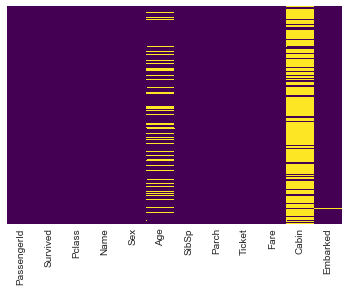

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Table of the missing data:

In [5]:
null_values = pd.DataFrame(pd.isnull(train).any())
null_values['Sum'] = pd.isnull(train).sum()
null_values

0  Sum
PassengerId  False    0
Survived     False    0
Pclass       False    0
Name         False    0
Sex          False    0
Age           True  177
SibSp        False    0
Parch        False    0
Ticket       False    0
Fare         False    0
Cabin         True  687
Embarked      True    2

Checking the amount of survivors and its respective distribution for sex and Pclass:

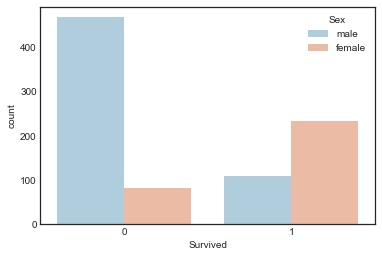

In [6]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

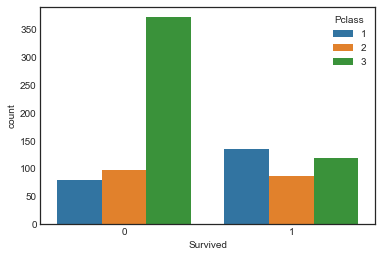

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=train)

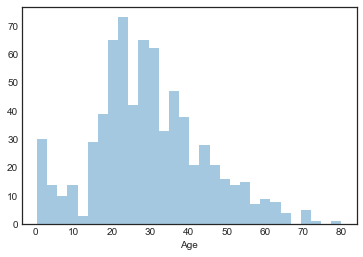

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


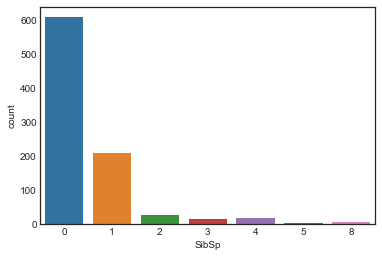

In [10]:
sns.countplot(x='SibSp',data=train)

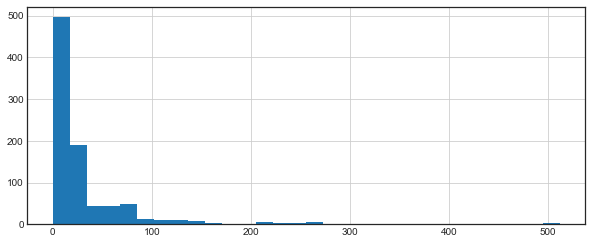

In [11]:
train['Fare'].hist(bins=30,figsize=(10,4))

In [12]:
##import cufflinks as cf

In [13]:
## train['Fare'].iplot(kind='hist')

# Cleaning the Data

The missing values are going to be filled with an average of the age of passenger per class

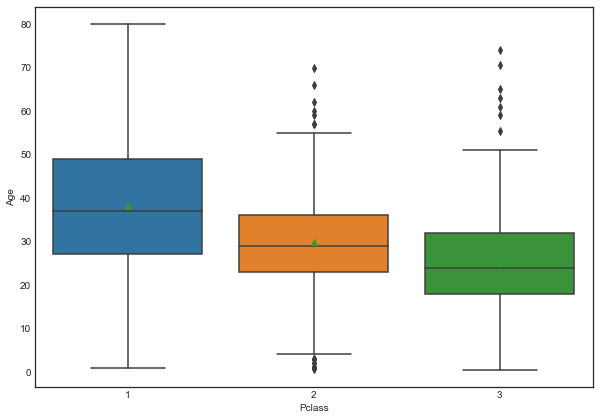

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train,showmeans=True)

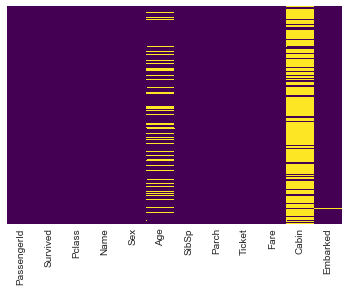

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
train.drop('Cabin',axis=1,inplace=True)

In [17]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [18]:
## train.dropna(inplace=True)

Creating dummy variables for sex and embarked columns:

In [19]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
Passclass = pd.get_dummies(train['Pclass'],drop_first=True)
train = pd.concat([train,sex,embarked,Passclass],axis=1)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  2  3  
0      0         A/5 21171   7.2500        S     1  0  1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  0  1  
3      0            113803  53.1000        S     0  0  1  0  0  
4      0            373450   8.0500        S     1  0  1  0  1

In [20]:
from sklearn.linear_model import LinearRegression

### Populate missing ages  using LinearRegression
def setMissingAges(df):
    
    # Grab all numerical features that can be included in a Linear Regression
    age_df = df[['Age','Q', 'S','Fare', 'Parch', 'SibSp']]
    
    # Split into sets with known and unknown Age values
    knownAge = age_df.loc[ (df.Age.notnull()) ]
    unknownAge = age_df.loc[ (df.Age.isnull()) ]
    
    # All age values are stored in a target array
    y = knownAge.values[:, 0]
    
    # All the other values are stored in the feature array
    X = knownAge.values[:, 1::]
    
    # Create and fit a model
    lm = LinearRegression()
    lm.fit(X,y)
    
    # Use the fitted model to predict the missing values
    predictedAges = lm.predict(unknownAge.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df

setMissingAges(train)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
5                                     Moran, Mr. James    male  31.781748   
6                              McCarthy, Mr. Timothy J    male  54.000000   
7                       Palsson, Master. Gosta Leonard    male   2.000000   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.000000   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.000000   
10                     Sandstrom, Miss. Marguerite Rut  female   4.000000   
11                            Bonnell, Miss. Elizabeth  female  58.000000   
12                      Saundercock, Mr. William Henry    male  20.000000   
13                         Andersson, Mr. Anders Johan    male  39.000000   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.000000   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.000000   
16                                Rice, Master. Eugene    male   2.000000   
17                        Williams, Mr. Charles Eugene    male  31.991232   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.000000   
19                             Masselmani, Mrs. Fatima  female  30.993444   
20                             

In [21]:
train.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

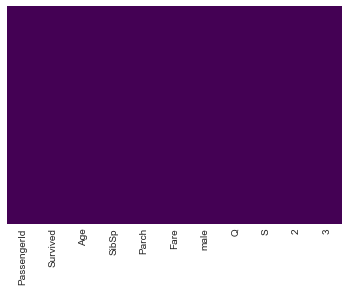

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
train.head()

PassengerId  Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0            1         0  22.0      1      0   7.2500     1  0  1  0  1
1            2         1  38.0      1      0  71.2833     0  0  0  0  0
2            3         1  26.0      0      0   7.9250     0  0  1  0  1
3            4         1  35.0      1      0  53.1000     0  0  1  0  0
4            5         0  35.0      0      0   8.0500     1  0  1  0  1

Now cleaning the test data:

In [24]:
test = pd.read_csv('titanic_test.csv')
test.drop('Cabin',axis=1,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [25]:
def impute_fare(cols):
    """ (list of intergers)->NoneType
    
    Change the age of the passengers if it is not in the data
    with the average age of the passengers of the same Pclass.
    """
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        
        if Pclass == 1:
            return 70
        elif Pclass == 2:
            return 50
        else:
            return 8
    else:
        return Fare

In [26]:
test['Fare'] = test[['Fare','Pclass']].apply(impute_fare,axis=1)
sextest = pd.get_dummies(test['Sex'],drop_first=True)
embarkedtest = pd.get_dummies(test['Embarked'],drop_first=True)
Passclasstest = pd.get_dummies(test['Pclass'],drop_first=True)
test = pd.concat([test,sextest,embarkedtest,Passclasstest],axis=1)
test.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.4 KB


In [27]:
setMissingAges(test)

PassengerId        Age  SibSp  Parch      Fare  male  Q  S  2  3
0            892  34.500000      0      0    7.8292     1  1  0  0  1
1            893  47.000000      1      0    7.0000     0  0  1  0  1
2            894  62.000000      0      0    9.6875     1  1  0  1  0
3            895  27.000000      0      0    8.6625     1  0  1  0  1
4            896  22.000000      1      1   12.2875     0  0  1  0  1
5            897  14.000000      0      0    9.2250     1  0  1  0  1
6            898  30.000000      0      0    7.6292     0  1  0  0  1
7            899  26.000000      1      1   29.0000     1  0  1  1  0
8            900  18.000000      0      0    7.2292     0  0  0  0  1
9            901  21.000000      2      0   24.1500     1  0  1  0  1
10           902  28.650685      0      0    7.8958     1  0  1  0  1
11           903  46.000000      0      0   26.0000     1  0  1  0  0
12           904  23.000000      1      0   82.2667     0  0  1  0  0
13           905  63.000000      1      0   26.0000     1  0  1  1  0
14           906  47.000000      1      0   61.1750     0  0  1  0  0
15           907  24.000000      1      0   27.7208     0  0  0  1  0
16           908  35.000000      0      0   12.3500     1  1  0  1  0
17           909  21.000000      0      0    7.2250     1  0  0  0  1
18           910  27.000000      1      0    7.9250     0  0  1  0  1
19           911  45.000000      0      0    7.2250     0  0  0  0  1
20           912  55.000000      1      0   59.4000     1  0  0  0  0
21           913   9.000000      0      1    3.1708     1  0  1  0  1
22           914  30.626809      0      0   31.6833     0  0  1  0  0
23           915  21.000000      0      1   61.3792     1  0  0  0  0
24           916  48.000000      1      3  262.3750     0  0  0  0  0
25           917  50.000000      1      0   14.5000     1  0  1  0  1
26           918  22.000000      0      1   61.9792     0  0  0  0  0
27           919  22.500000      0      0    7.2250     1  0  0  0  1
28           920  41.000000      0      0   30.5000     1  0  1  0  0
29           921  28.188717      2      0   21.6792     1  0  0  0  1
..           ...        ...    ...    ...       ...   ... .. .. .. ..
388         1280  21.000000      0      0    7.7500     1  1  0  0  1
389         1281   6.000000      3      1   21.0750     1  0  1  0  1
390         1282  23.000000      0      0   93.5000     1  0  1  0  0
391         1283  51.000000      0      1   39.4000     0  0  1  0  0
392         1284  13.000000      0      2   20.2500     1  0  1  0  1
393         1285  47.000000      0      0   10.5000     1  0  1  1  0
394         1286  29.000000      3      1   22.0250     1  0  1  0  1
395         1287  18.000000      1      0   60.0000     0  0  1  0  0
396         1288  24.000000      0      0    7.2500     1  1  0  0  1
397         1289  48.000000      1      1   79.2000     0  0  0  0  0
398         1290  22.000000      0      0    7.7750     1  0  1  0  1
399         1291  31.000000      0      0    7.7333     1  1  0  0  1
400         1292  30.000000      0      0  164.8667     0  0  1  0  0
401         1293  38.000000      1      0   21.0000     1  0  1  1  0
402         1294  22.000000      0      1   59.4000     0  0  0  0  0
403         1295  17.000000      0      0   47.1000     1  0  1  0  0
404         1296  43.000000      1      0   27.7208     1  0  0  0  0
405         1297  20.000000      0      0   13.8625     1  0  0  1  0
406         1298  23.000000      1      0   10.5000     1  0  1  1  0
407         1299  50.000000      1      1  211.5000     1  0  0  0  0
408         1300  29.358017      0      0    7.7208     0  1  0  0  1
409         1301   3.000000      1      1   13.7750     0  0  1  0  1
410         1302  29.360442      0      0    7.7500     0  1  0  0  1
411         1303  37.000000      1      0   90.0000     0  1  0  0  0
412         1304  28.000000      0      0    7.7750     0  0  1  0  1
413         130

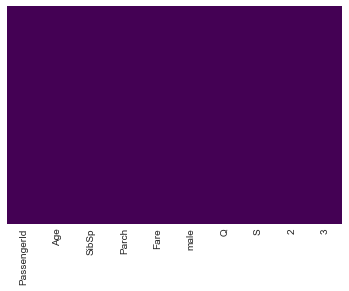

In [28]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Train

In [29]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']

In [30]:
## from sklearn.model_selection import train_test_split

In [31]:
## X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression

In [42]:
logmodel = LogisticRegression(class_weight='balanced')

In [43]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [44]:
X_test = test

In [45]:
predictions = logmodel.predict(X_test)

In [46]:
logmodel.coef_

array([[  2.07079395e-04,  -3.06709275e-02,  -3.47158851e-01,
         -7.84383006e-02,   5.49067268e-03,  -2.42506569e+00,
          1.46333369e-02,  -3.24267625e-01,  -5.79902586e-01,
         -1.58552116e+00]])

In [47]:
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0
 1 1 1 1 1 1 0 1 0 0 0]


Creating the "Passenger Submission.csv" file with the format needed for kaggle competition.

In [48]:
df = pd.DataFrame(test['PassengerId'])
df['Survived']=predictions
df.to_csv("Passenger Submission.csv", encoding='utf-8', index=False)